In [1]:
import numpy
import ga

In [5]:


"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 6 #IT17123150 Changed num_parents_mating from 4 to 6

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-6.0, high=6.0, size=pop_size) #IT17123150 Changed low and high from (-4.0, 4.0) to (-6.0, 6.0)
print(new_population)


[[-3.42671047  0.19660624 -3.63984422 -3.41259386  0.23854497 -4.33949126]
 [ 2.69445245 -0.22515243  5.6916767   0.52271138 -5.22649364 -0.84596907]
 [ 4.94228494  1.67374027 -2.47449987 -1.17382451 -4.61375872 -4.12633345]
 [-4.52056029  3.5953945  -4.96860932  5.90235524  3.76257234  4.7206519 ]
 [-3.82976039 -2.86620089 -3.13096203 -3.31052567 -1.65937776  3.02091701]
 [ 2.56347427 -1.36338349  0.94805485  0.4875643  -3.55963298 -5.46347506]
 [ 3.04590838  4.20096418 -2.25700907  2.60216119 -2.34901135  0.8774531 ]
 [ 0.70537606 -0.21457318  3.58443987 -4.37222208 -1.32414906 -2.04505865]]


In [6]:


best_outputs = []
num_generations = 2000 ##IT17123150 Changed num_generations from 1000 to 2000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    

Generation :  0
Fitness
[-26.1308642   95.23002461  72.0369003  -76.72674619 -33.04278976
  83.57097303  30.60807462  18.1124951 ]
Best result :  95.23002461472518
Parents
[[ 2.69445245 -0.22515243  5.6916767   0.52271138 -5.22649364 -0.84596907]
 [ 2.56347427 -1.36338349  0.94805485  0.4875643  -3.55963298 -5.46347506]
 [ 4.94228494  1.67374027 -2.47449987 -1.17382451 -4.61375872 -4.12633345]
 [ 3.04590838  4.20096418 -2.25700907  2.60216119 -2.34901135  0.8774531 ]
 [ 0.70537606 -0.21457318  3.58443987 -4.37222208 -1.32414906 -2.04505865]
 [-3.42671047  0.19660624 -3.63984422 -3.41259386  0.23854497 -4.33949126]]
Crossover
[[ 2.69445245 -0.22515243  5.6916767   0.4875643  -3.55963298 -5.46347506]
 [ 2.56347427 -1.36338349  0.94805485 -1.17382451 -4.61375872 -4.12633345]]
Mutation
[[ 2.69445245 -0.22515243  5.94116006  0.4875643  -3.55963298 -6.01334816]
 [ 2.56347427 -1.36338349  0.73032389 -1.17382451 -4.61375872 -3.98703149]]
Generation :  1
Fitness
[ 95.23002461  83.57097303  72.0

Best solution :  [[[ 2.69445245e+00 -2.25152431e-01  3.99831303e+02  4.87564297e-01
   -3.55963298e+00 -3.29495056e+02]]]
Best solution fitness :  [3000.85822317]


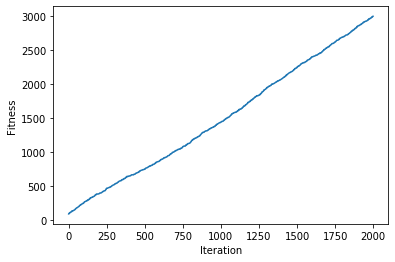

In [7]:

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()
